In [122]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import *
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import *
from  scipy import stats
from sklearn.model_selection import cross_val_score
import math
import pickle
import warnings
warnings.filterwarnings('ignore')


## Weather Data PRE-PROCESSING

In [123]:
weather_df = pd.read_csv("weather.csv")
taxi_df = pd.read_csv("taxi-rides.csv")

In [124]:
weather_df.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [125]:
taxi_df.head(5)

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [126]:
weather_df.info() ,taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source          

(None, None)

In [127]:
weather_df["time_stamp"] 

0       1545003901
1       1545003901
2       1545003901
3       1545003901
4       1545003901
           ...    
6271    1543819974
6272    1543819974
6273    1543819974
6274    1543819974
6275    1543819974
Name: time_stamp, Length: 6276, dtype: int64

In [128]:
taxi_df["time_stamp"]

0         1.544770e+12
1         1.543400e+12
2         1.544920e+12
3         1.543620e+12
4         1.543580e+12
              ...     
554451    1.543620e+12
554452    1.543550e+12
554453    1.543530e+12
554454    1.543650e+12
554455    1.543620e+12
Name: time_stamp, Length: 554456, dtype: float64

In [129]:
weather_df["time_stamp"][0] 

1545003901

In [130]:
taxi_df["time_stamp"][0]

1544770000000.0

In [131]:
weather_df['time_stamp'] = pd.to_datetime(weather_df['time_stamp'], unit='s')
taxi_df['time_stamp'] = pd.to_datetime(taxi_df['time_stamp']/1000, unit='s')

In [132]:
weather_df["time_stamp"].min(),taxi_df["time_stamp"].min()

(Timestamp('2018-11-26 03:40:44'), Timestamp('2018-11-26 02:40:00'))

In [133]:
weather_df["time_stamp"].max() ,taxi_df["time_stamp"].max()

(Timestamp('2018-12-18 18:45:02'), Timestamp('2018-12-18 19:06:40'))

In [134]:
# Round to the nearest hour
weather_df['time_stamp'] = weather_df['time_stamp'].dt.round('min')
taxi_df['time_stamp'] = taxi_df['time_stamp'].dt.round('min')


In [135]:
weather_df["time_stamp"].min(),taxi_df["time_stamp"].min()

(Timestamp('2018-11-26 03:41:00'), Timestamp('2018-11-26 02:40:00'))

In [136]:
weather_df["time_stamp"].max() ,taxi_df["time_stamp"].max()

(Timestamp('2018-12-18 18:45:00'), Timestamp('2018-12-18 19:07:00'))

In [137]:
weather_df.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,2018-12-16 23:45:00,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,2018-12-16 23:45:00,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,2018-12-16 23:45:00,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,2018-12-16 23:45:00,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,2018-12-16 23:45:00,0.75,11.49


In [138]:
taxi_df.head(5)

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,2018-12-14 06:47:00,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,2018-11-28 10:13:00,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,2018-12-16 00:27:00,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,2018-11-30 23:20:00,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,2018-11-30 12:13:00,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [139]:
taxi_df.columns =['distance', 'cab_type', 'time_stamp', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price']

In [140]:
taxi_df["time_stamp_taxi"] = taxi_df["time_stamp"]
taxi_df["location_taxi"] = taxi_df["location"]
weather_df["location_weather"] = weather_df["location"]
weather_df["time_stamp_weather"] = weather_df["time_stamp"]

In [141]:
merged_df = pd.merge(taxi_df, weather_df, on=["time_stamp", "location"], how="outer", suffixes=('_taxi', '_weather'))


In [142]:
merged_df.head(5)

,distance,cab_type,time_stamp,destination,location,surge_multiplier,id,product_id,name,price,time_stamp_taxi,location_taxi,temp,clouds,pressure,rain,humidity,wind,location_weather,time_stamp_weather
0,2.31,Lyft,2018-11-26 02:40:00,Haymarket Square,Back Bay,1.00,76c23a0a-eb71-48c1-9eb4-6ea1a4fde87f,lyft_premier,Lux,16.5,2018-11-26 02:40:00,Back Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2.31,Lyft,2018-11-26 02:40:00,Haymarket Square,Back Bay,1.00,824fecb1-1503-41e8-a15a-5a5681d29259,lyft,Lyft,10.5,2018-11-26 02:40:00,Back Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2.31,Lyft,2018-11-26 02:40:00,Haymarket Square,Back Bay,1.00,ea7f9a8c-25f8-4e23-b2ec-65e0492fd417,lyft_luxsuv,Lux Black XL,32.5,2018-11-26 02:40:00,Back Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2.84,Uber,2018-11-26 02:40:00,North End,Back Bay,1.00,106a9d6b-c75a-401a-9063-48269bac2400,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2018-11-26 02:40:00,Back Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1.66,Lyft,2018-11-26 02:40:00,Fenway,Back Bay,1.75,aa285c25-4eb0-4f24-aa9d-698beb96d8e0,lyft_premier,Lux,26.0,2018-11-26 02:40:00,Back Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [143]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560684 entries, 0 to 560683
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   distance            554456 non-null  float64       
 1   cab_type            554456 non-null  object        
 2   time_stamp          560684 non-null  datetime64[ns]
 3   destination         554456 non-null  object        
 4   location            560684 non-null  object        
 5   surge_multiplier    554456 non-null  float64       
 6   id                  554456 non-null  object        
 7   product_id          554456 non-null  object        
 8   name                554456 non-null  object        
 9   price               510321 non-null  float64       
 10  time_stamp_taxi     554456 non-null  datetime64[ns]
 11  location_taxi       554456 non-null  object        
 12  temp                22840 non-null   float64       
 13  clouds              22840 non

In [144]:
merged_df.shape

(560684, 20)

In [145]:
merged_df.isna().sum()

distance                6228
cab_type                6228
time_stamp                 0
destination             6228
location                   0
surge_multiplier        6228
id                      6228
product_id              6228
name                    6228
price                  50363
time_stamp_taxi         6228
location_taxi           6228
temp                  537844
clouds                537844
pressure              537844
rain                  559790
humidity              537844
wind                  537844
location_weather      537844
time_stamp_weather    537844
dtype: int64

In [146]:
merged_df = merged_df.dropna(subset=["price"])

In [147]:
merged_df.isna().sum()

distance                   0
cab_type                   0
time_stamp                 0
destination                0
location                   0
surge_multiplier           0
id                         0
product_id                 0
name                       0
price                      0
time_stamp_taxi            0
location_taxi              0
temp                  495048
clouds                495048
pressure              495048
rain                  510321
humidity              495048
wind                  495048
location_weather      495048
time_stamp_weather    495048
dtype: int64

In [148]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price',
       'time_stamp_taxi', 'location_taxi', 'temp', 'clouds', 'pressure',
       'rain', 'humidity', 'wind', 'location_weather', 'time_stamp_weather'],
      dtype='object')

In [149]:
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'])
weather_df['time_stamp'] = pd.to_datetime(weather_df['time_stamp'])

# Sort weather_df by time_stamp for efficient lookup
weather_df = weather_df.sort_values(by='time_stamp').reset_index(drop=True)


In [150]:
merged_df.columns = ['distance', 'cab_type', 'time_stamp', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price',
       'time_s', 'location_taxi', 'temp', 'clouds', 'pressure',
       'rain', 'humidity', 'wind', 'location_weather', 'time_st']

In [151]:
weather_df.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'location_weather', 'time_stamp_weather'],
      dtype='object')

In [152]:
weather_df.columns =['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind', 'location_weather', 'time_st']

In [153]:
import pandas as pd

# Ensure time_stamp is datetime format
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'])
weather_df['time_stamp'] = pd.to_datetime(weather_df['time_stamp'])

# Sort both DataFrames by time_stamp
merged_df = merged_df.sort_values(by='time_stamp')
weather_df = weather_df.sort_values(by='time_stamp')

# Round weather_df time_stamp to the nearest 30 minutes
weather_df['time_stamp_rounded'] = weather_df['time_stamp'].dt.round('30min')

# Use merge_asof to find the closest matching weather row within 30 minutes
aligned_weather = pd.merge_asof(
    merged_df,
    weather_df,
    left_on='time_stamp',
    right_on='time_stamp_rounded',
    by='location',
    tolerance=pd.Timedelta(minutes=30),
    direction='nearest',
    suffixes=('_taxi', '_weather')
)

# Columns to update from weather_df
weather_columns = ['temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']

# Fill missing weather data in merged_df
for col in weather_columns:
    aligned_weather[col] = aligned_weather[col + '_taxi'].fillna(aligned_weather[col + '_weather'])

# Drop extra weather columns created during merge
drop_columns = [col + '_weather' for col in weather_columns] + ['time_stamp_rounded']
aligned_weather.drop(columns=[col for col in drop_columns if col in aligned_weather.columns], inplace=True)


In [154]:
aligned_weather

,distance,cab_type,time_stamp_taxi,destination,location,surge_multiplier,id,product_id,name,price,...,time_st_taxi,time_stamp_weather,location_weather_weather,time_st_weather,temp,clouds,pressure,rain,humidity,wind
0,2.31,Lyft,2018-11-26 02:40:00,Haymarket Square,Back Bay,1.0,76c23a0a-eb71-48c1-9eb4-6ea1a4fde87f,lyft_premier,Lux,16.5,...,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,1.23,Lyft,2018-11-26 02:40:00,West End,North End,1.0,a8b37ec2-b380-47da-8269-590dfaaffdbf,lyft_lux,Lux Black,19.5,...,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,1.23,Lyft,2018-11-26 02:40:00,West End,North End,1.0,89f35ef7-7129-483d-b3e6-d89afdf6946d,lyft_line,Shared,5.0,...,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,1.23,Lyft,2018-11-26 02:40:00,West End,North End,1.0,9e6a67e6-9628-4fb1-94e5-bf426f61b038,lyft_premier,Lux,13.5,...,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,3.05,Uber,2018-11-26 02:40:00,Fenway,North Station,1.0,f67b0a6b-08f9-43bb-b47d-efad7310d4c7,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,10.5,...,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510316,4.54,Lyft,2018-12-18 19:07:00,Fenway,Financial District,1.0,722c67c5-98ea-4f69-899d-0a96034ef2d9,lyft_lux,Lux Black,34.0,...,NaT,2018-12-18 18:45:00,Financial District,2018-12-18 18:45:00,31.19,0.0,1012.31,NaN,0.45,13.18
510317,4.48,Uber,2018-12-18 19:07:00,Fenway,Financial District,1.0,2e438a0a-8aa1-4107-9dba-17719fb9a156,6c84fd89-3f11-4782-9b50-97c468b19529,Black,33.5,...,NaT,2018-12-18 18:45:00,Financial District,2018-12-18 18:45:00,31.19,0.0,1012.31,NaN,0.45,13.18
510318,0.39,Uber,2018-12-18 19:07:00,South Station,Financial District,1.0,666129a3-a914-4109-9dad-90f191f9ebc1,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0,...,NaT,2018-12-18 18:45:00,Financial District,2018-12-18 18:45:00,31.19,0.0,1012.31,NaN,0.45,13.18
510319,1.08,Lyft,2018-12-18 19:07:00,Haymarket Square,Financial District,1.0,b98e14ef-f728-44b5-ab00-6c0f88da6cd7,lyft_lux,Lux Black,16.5,...,NaT,2018-12-18 18:45:00,Financial District,2018-12-18 18:45:00,31.19,0.0,1012.31,NaN,0.45,13.18


In [155]:
aligned_weather.isna().sum()

distance                         0
cab_type                         0
time_stamp_taxi                  0
destination                      0
location                         0
surge_multiplier                 0
id                               0
product_id                       0
name                             0
price                            0
time_s                           0
location_taxi                    0
temp_taxi                   495048
clouds_taxi                 495048
pressure_taxi               495048
rain_taxi                   510321
humidity_taxi               495048
wind_taxi                   495048
location_weather_taxi       495048
time_st_taxi                495048
time_stamp_weather            2273
location_weather_weather      2273
time_st_weather               2273
temp                          2273
clouds                        2273
pressure                      2273
rain                        443865
humidity                      2273
wind                

In [156]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', 'time_s',
       'location_taxi', 'temp', 'clouds', 'pressure', 'rain', 'humidity',
       'wind', 'location_weather', 'time_st'],
      dtype='object')

In [157]:
aligned_weather = aligned_weather.dropna(subset=["temp"])

In [158]:
aligned_weather[aligned_weather.temp_taxi.isna()][["time_stamp_taxi" , "time_stamp_weather"]]

,time_stamp_taxi,time_stamp_weather
68,2018-11-26 05:27:00,2018-11-26 05:18:00
69,2018-11-26 05:27:00,2018-11-26 05:18:00
70,2018-11-26 05:27:00,2018-11-26 05:18:00
71,2018-11-26 05:27:00,2018-11-26 05:18:00
72,2018-11-26 05:27:00,2018-11-26 05:18:00
...,...,...
510316,2018-12-18 19:07:00,2018-12-18 18:45:00
510317,2018-12-18 19:07:00,2018-12-18 18:45:00
510318,2018-12-18 19:07:00,2018-12-18 18:45:00
510319,2018-12-18 19:07:00,2018-12-18 18:45:00


In [159]:
aligned_weather.columns

Index(['distance', 'cab_type', 'time_stamp_taxi', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', 'time_s',
       'location_taxi', 'temp_taxi', 'clouds_taxi', 'pressure_taxi',
       'rain_taxi', 'humidity_taxi', 'wind_taxi', 'location_weather_taxi',
       'time_st_taxi', 'time_stamp_weather', 'location_weather_weather',
       'time_st_weather', 'temp', 'clouds', 'pressure', 'rain', 'humidity',
       'wind'],
      dtype='object')

In [160]:
aligned_weather.columns

Index(['distance', 'cab_type', 'time_stamp_taxi', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', 'time_s',
       'location_taxi', 'temp_taxi', 'clouds_taxi', 'pressure_taxi',
       'rain_taxi', 'humidity_taxi', 'wind_taxi', 'location_weather_taxi',
       'time_st_taxi', 'time_stamp_weather', 'location_weather_weather',
       'time_st_weather', 'temp', 'clouds', 'pressure', 'rain', 'humidity',
       'wind'],
      dtype='object')

In [161]:
merged_df = aligned_weather

In [162]:
merged_df.isna().sum()

distance                         0
cab_type                         0
time_stamp_taxi                  0
destination                      0
location                         0
surge_multiplier                 0
id                               0
product_id                       0
name                             0
price                            0
time_s                           0
location_taxi                    0
temp_taxi                   492775
clouds_taxi                 492775
pressure_taxi               492775
rain_taxi                   508048
humidity_taxi               492775
wind_taxi                   492775
location_weather_taxi       492775
time_st_taxi                492775
time_stamp_weather               0
location_weather_weather         0
time_st_weather                  0
temp                             0
clouds                           0
pressure                         0
rain                        441592
humidity                         0
wind                

In [163]:
merged_df.head(5)

,distance,cab_type,time_stamp_taxi,destination,location,surge_multiplier,id,product_id,name,price,...,time_st_taxi,time_stamp_weather,location_weather_weather,time_st_weather,temp,clouds,pressure,rain,humidity,wind
68,2.86,Uber,2018-11-26 05:27:00,West End,Northeastern University,1.0,82a01adb-809b-44e9-ad2f-88913462b486,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,8.5,...,NaT,2018-11-26 05:18:00,Northeastern University,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06
69,3.22,Uber,2018-11-26 05:27:00,North Station,Northeastern University,1.0,beaa7fae-904d-44f1-a299-8c48cb6d9212,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,9.0,...,NaT,2018-11-26 05:18:00,Northeastern University,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06
70,1.64,Uber,2018-11-26 05:27:00,Back Bay,Northeastern University,1.0,c01cec29-629a-4d76-82e6-42dcc9163de6,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.5,...,NaT,2018-11-26 05:18:00,Northeastern University,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06
71,1.27,Lyft,2018-11-26 05:27:00,Back Bay,Northeastern University,1.0,bafb6305-8542-4a16-a278-dba8da3b7b56,lyft_plus,Lyft XL,10.5,...,NaT,2018-11-26 05:18:00,Northeastern University,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06
72,2.61,Uber,2018-11-26 05:27:00,Beacon Hill,Northeastern University,1.0,18e5c270-e688-46a2-b2dc-006f78ce3c5b,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,15.0,...,NaT,2018-11-26 05:18:00,Northeastern University,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06


In [164]:
merged_df["cab_type"].unique()

array(['Uber', 'Lyft'], dtype=object)

In [165]:
merged_df["cab_type"].value_counts()

cab_type
Uber    263199
Lyft    244849
Name: count, dtype: int64

In [166]:
merged_df.describe()

,distance,time_stamp_taxi,surge_multiplier,price,time_s,temp_taxi,clouds_taxi,pressure_taxi,rain_taxi,humidity_taxi,wind_taxi,time_st_taxi,time_stamp_weather,time_st_weather,temp,clouds,pressure,rain,humidity,wind
count,508048.000000,508048,508048.000000,508048.000000,508048,15273.000000,15273.000000,15273.000000,0.0,15273.000000,15273.000000,15273,508048,508048,508048.000000,508048.000000,508048.000000,66456.000000,508048.000000,508048.000000
mean,2.189624,2018-12-05 22:22:45.945028864,1.015109,16.544461,2018-12-05 22:22:45.945028864,38.002388,0.651669,1013.544818,NaN,0.813900,3.123206,2018-12-01 17:23:02.946376448,2018-12-05 22:15:46.354360064,2018-12-05 22:15:46.354360064,39.212513,0.672668,1010.271331,0.052036,0.746984,6.882725
min,0.020000,2018-11-26 05:27:00,1.000000,2.500000,2018-11-26 05:27:00,34.140000,0.060000,1000.690000,NaN,0.670000,1.500000,2018-11-30 03:53:00,2018-11-26 05:18:00,2018-11-26 05:18:00,19.670000,0.000000,988.570000,0.000200,0.450000,0.810000
25%,1.270000,2018-11-29 00:07:00,1.000000,9.000000,2018-11-29 00:07:00,34.400000,0.820000,1000.710000,NaN,0.760000,1.540000,2018-12-01 04:53:00,2018-11-29 00:02:00,2018-11-29 00:02:00,36.250000,0.450000,999.970000,0.008800,0.640000,3.620000
50%,2.160000,2018-12-02 08:40:00,1.000000,13.500000,2018-12-02 08:40:00,36.460000,0.830000,1018.710000,NaN,0.770000,3.750000,2018-12-01 04:53:00,2018-12-02 08:53:00,2018-12-02 08:53:00,40.190000,0.790000,1009.570000,0.024000,0.730000,6.680000
75%,2.930000,2018-12-14 23:27:00,1.000000,22.500000,2018-12-14 23:27:00,44.690000,0.880000,1018.720000,NaN,0.950000,3.800000,2018-12-03 06:53:00,2018-12-14 22:45:00,2018-12-14 22:45:00,43.770000,0.950000,1021.870000,0.059100,0.870000,9.880000
max,7.860000,2018-12-18 19:07:00,3.000000,97.500000,2018-12-18 19:07:00,44.850000,0.890000,1021.650000,NaN,0.960000,5.670000,2018-12-03 06:53:00,2018-12-18 18:45:00,2018-12-18 18:45:00,54.400000,1.000000,1034.980000,0.214900,0.990000,18.180000
std,1.136591,NaN,0.095654,9.320638,NaN,4.041441,0.341790,8.024785,NaN,0.101342,1.694865,NaN,NaN,NaN,6.662368,0.318904,13.376328,0.064178,0.128934,3.647647


array([[<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'time_stamp_taxi'}>,
        <Axes: title={'center': 'surge_multiplier'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'time_s'}>,
        <Axes: title={'center': 'temp_taxi'}>,
        <Axes: title={'center': 'clouds_taxi'}>,
        <Axes: title={'center': 'pressure_taxi'}>],
       [<Axes: title={'center': 'rain_taxi'}>,
        <Axes: title={'center': 'humidity_taxi'}>,
        <Axes: title={'center': 'wind_taxi'}>,
        <Axes: title={'center': 'time_st_taxi'}>],
       [<Axes: title={'center': 'time_stamp_weather'}>,
        <Axes: title={'center': 'time_st_weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'clouds'}>],
       [<Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'wind'}>]], dtype=object)

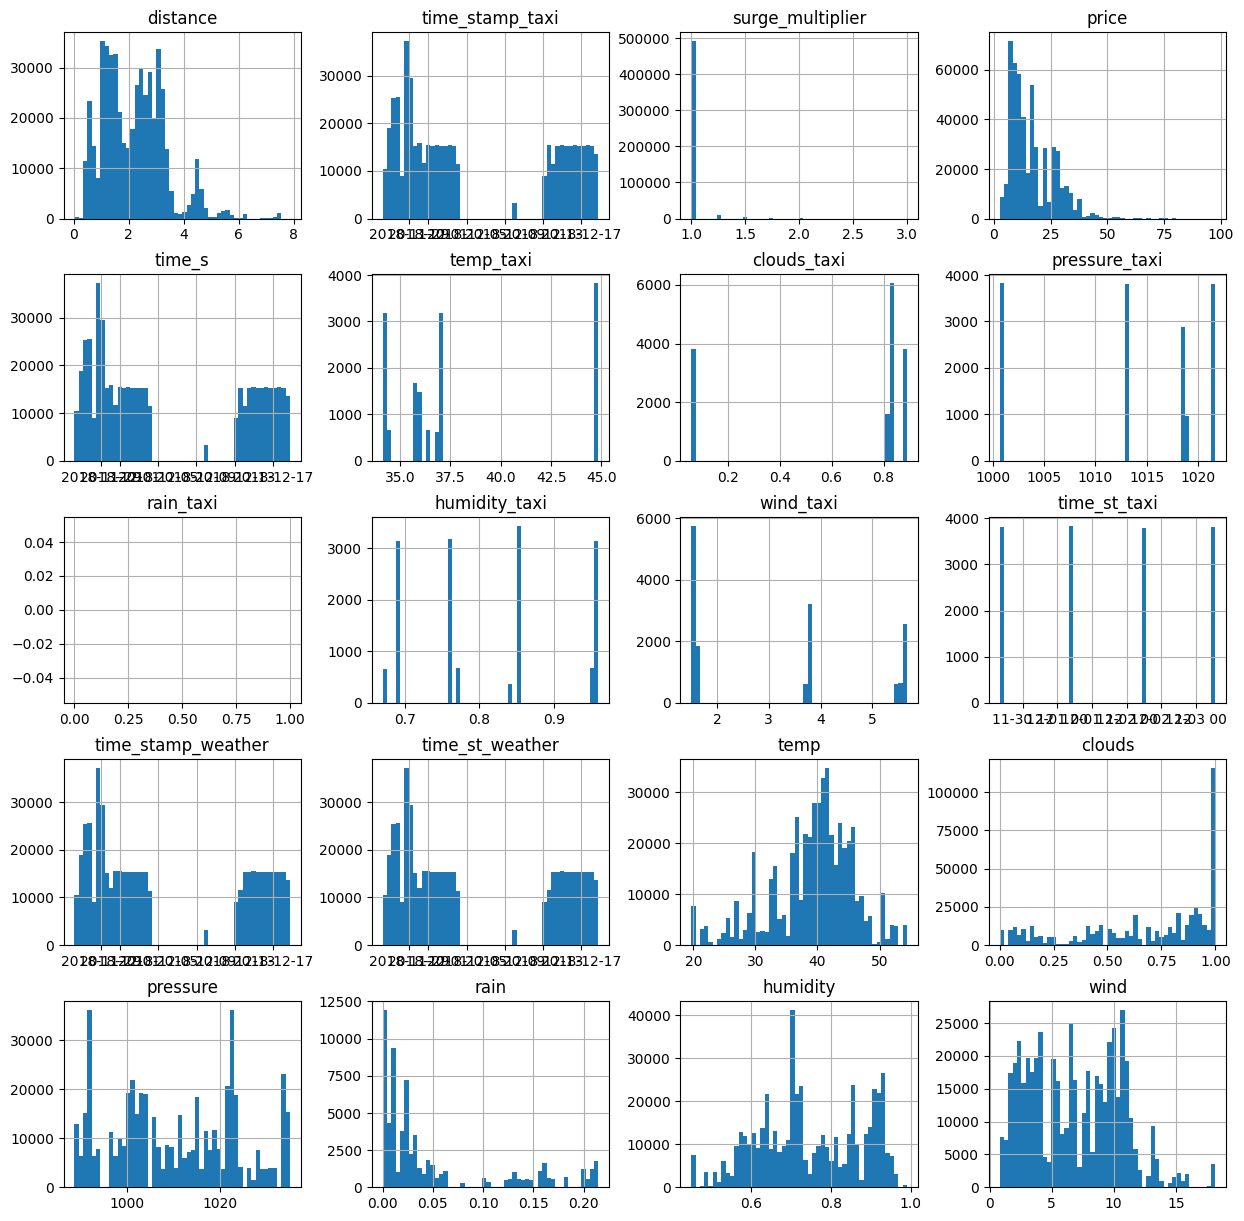

In [167]:
merged_df.hist(bins= 50 , figsize=(15,15) )

In [168]:
merged_df["destination"].value_counts()

destination
Financial District         43232
Northeastern University    42439
North End                  42436
Back Bay                   42351
Fenway                     42316
West End                   42274
South Station              42268
Boston University          42256
Haymarket Square           42249
North Station              42094
Beacon Hill                42079
Theatre District           42054
Name: count, dtype: int64

In [169]:
merged_df["location"].value_counts()

location
Financial District         43274
North End                  42470
Boston University          42418
South Station              42367
Fenway                     42349
Theatre District           42317
Northeastern University    42267
Haymarket Square           42213
Back Bay                   42166
North Station              42114
West End                   42111
Beacon Hill                41982
Name: count, dtype: int64

In [170]:
merged_df["surge_multiplier"].value_counts()

surge_multiplier
1.00    491318
1.25      8844
1.50      4021
1.75      1931
2.00      1799
2.50       125
3.00        10
Name: count, dtype: int64

In [171]:
merged_df["name"].value_counts()

name
UberX           44013
UberPool        43925
Black SUV       43835
WAV             43834
Black           43806
UberXL          43786
Lyft XL         40925
Lux Black       40866
Lyft            40812
Lux Black XL    40796
Lux             40795
Shared          40655
Name: count, dtype: int64

In [172]:
merged_df["location"].value_counts()

location
Financial District         43274
North End                  42470
Boston University          42418
South Station              42367
Fenway                     42349
Theatre District           42317
Northeastern University    42267
Haymarket Square           42213
Back Bay                   42166
North Station              42114
West End                   42111
Beacon Hill                41982
Name: count, dtype: int64

In [173]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp_taxi', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', 'time_s',
       'location_taxi', 'temp_taxi', 'clouds_taxi', 'pressure_taxi',
       'rain_taxi', 'humidity_taxi', 'wind_taxi', 'location_weather_taxi',
       'time_st_taxi', 'time_stamp_weather', 'location_weather_weather',
       'time_st_weather', 'temp', 'clouds', 'pressure', 'rain', 'humidity',
       'wind'],
      dtype='object')

In [174]:
merged_df_int = merged_df[['distance', 'surge_multiplier',  'price', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind']]

In [175]:
merged_df_int.corr()

,distance,surge_multiplier,price,temp,clouds,pressure,rain,humidity,wind
distance,1.000000,0.025342,0.345159,-0.003505,-0.001914,0.003560,-0.007507,-0.006022,-0.004344
surge_multiplier,0.025342,1.000000,0.239478,-0.000182,0.001130,-0.002592,-0.005225,-0.000313,0.001462
price,0.345159,0.239478,1.000000,-0.001135,0.001190,0.000467,-0.004207,-0.003218,-0.000756
temp,-0.003505,-0.000182,-0.001135,1.000000,0.448654,-0.391583,0.313292,0.376762,0.129600
clouds,-0.001914,0.001130,0.001190,0.448654,1.000000,-0.209122,0.191914,0.517844,0.116745
pressure,0.003560,-0.002592,0.000467,-0.391583,-0.209122,1.000000,-0.133680,-0.131601,-0.554533
rain,-0.007507,-0.005225,-0.004207,0.313292,0.191914,-0.133680,1.000000,0.196194,0.391055
humidity,-0.006022,-0.000313,-0.003218,0.376762,0.517844,-0.131601,0.196194,1.000000,-0.222097
wind,-0.004344,0.001462,-0.000756,0.129600,0.116745,-0.554533,0.391055,-0.222097,1.000000


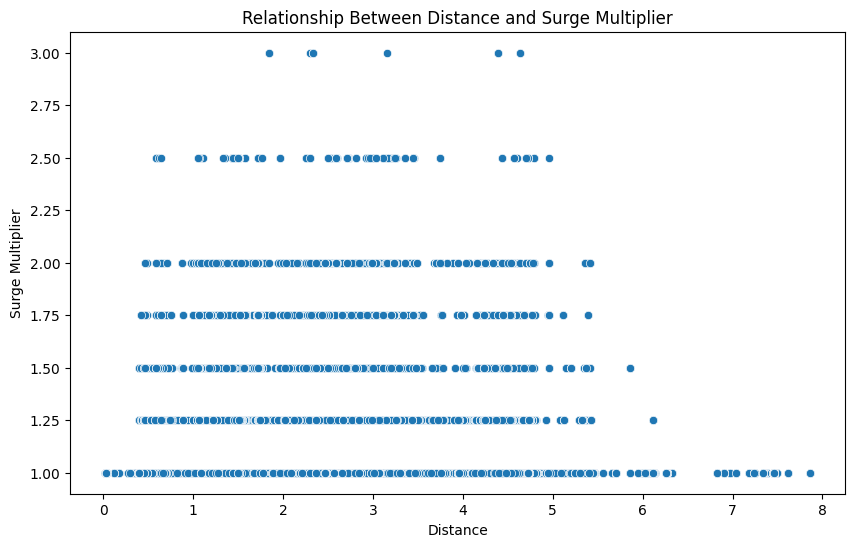

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df exists and contains the 'distance' and 'surge_multiplier' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['distance'], y=merged_df['surge_multiplier'])

# Add labels and title
plt.title("Relationship Between Distance and Surge Multiplier")
plt.xlabel("Distance")
plt.ylabel("Surge Multiplier")

# Show plot
plt.show()

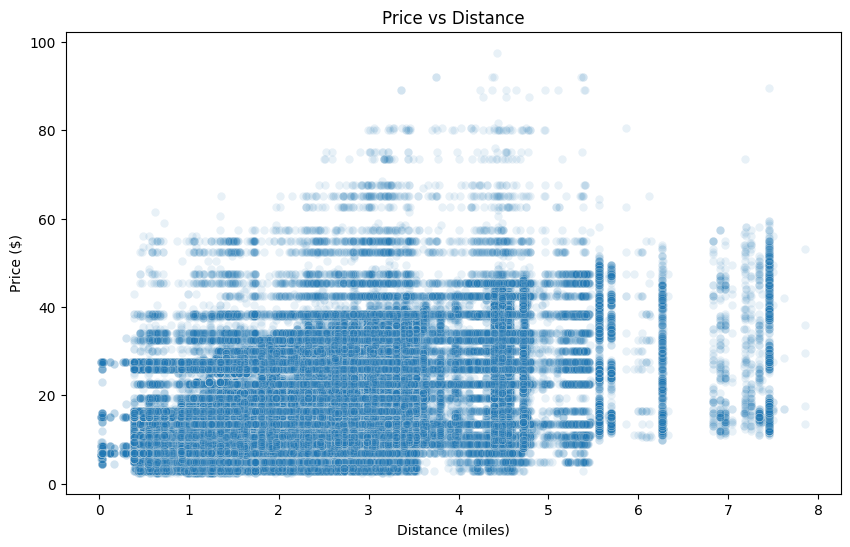

In [177]:
# Create a scatter plot of price vs distance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='distance', y='price', alpha=0.1)
plt.title('Price vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Price ($)')
plt.show()


# not working

In [178]:
# Unique counts for categorical columns
categorical_summary = merged_df[['cab_type', 'destination', 'location', 'name', 'location']].nunique()
categorical_summary

cab_type        2
destination    12
location       12
name           12
location       12
dtype: int64

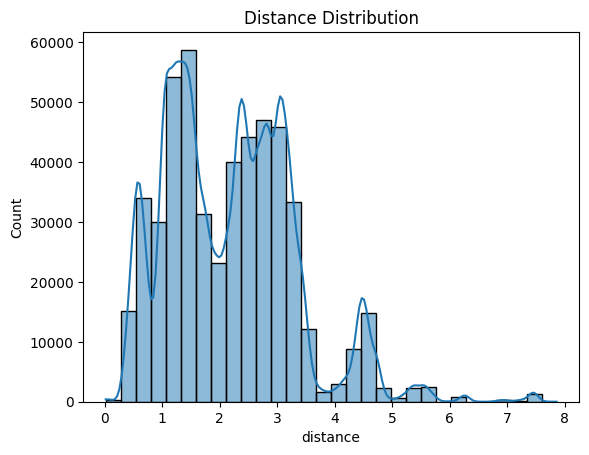

In [179]:
# Distance distribution
sns.histplot(merged_df['distance'], kde=True, bins=30)
plt.title("Distance Distribution")
plt.show()


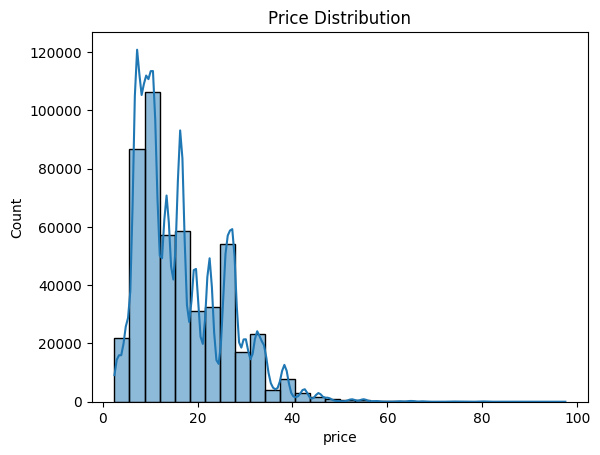

In [180]:
# Price distribution
sns.histplot(merged_df['price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.show()


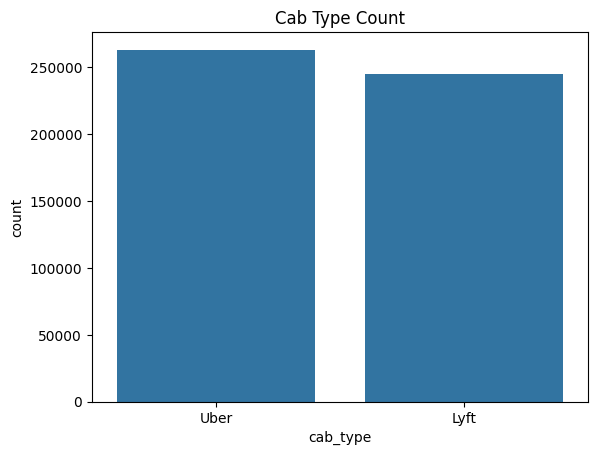

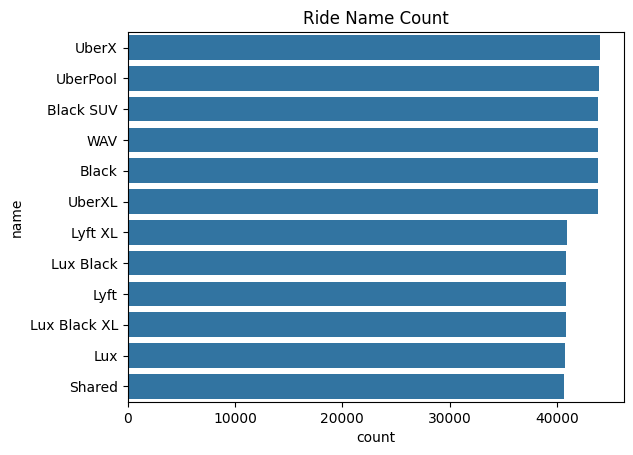

In [181]:
sns.countplot(x=merged_df['cab_type'])
plt.title("Cab Type Count")
plt.show()

sns.countplot(y=merged_df['name'], order=merged_df['name'].value_counts().index)
plt.title("Ride Name Count")
plt.show()

In [182]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp_taxi', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', 'time_s',
       'location_taxi', 'temp_taxi', 'clouds_taxi', 'pressure_taxi',
       'rain_taxi', 'humidity_taxi', 'wind_taxi', 'location_weather_taxi',
       'time_st_taxi', 'time_stamp_weather', 'location_weather_weather',
       'time_st_weather', 'temp', 'clouds', 'pressure', 'rain', 'humidity',
       'wind'],
      dtype='object')

In [183]:
merged_df["time_stamp"] =merged_df["time_stamp_weather"]

In [184]:
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'], unit='s')
merged_df['hour'] = merged_df['time_stamp'].dt.hour
merged_df['day'] = merged_df['time_stamp'].dt.day


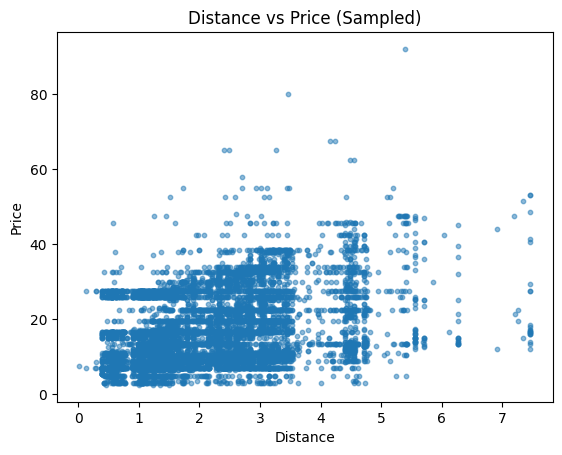

In [185]:
# Take a random sample of 10,000 rows
sampled_df = merged_df.sample(10000, random_state=42)

# Plot using the sample
plt.scatter(sampled_df['distance'], sampled_df['price'], alpha=0.5, s=10)
plt.title("Distance vs Price (Sampled)")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.show()


In [186]:
hourly_data = sampled_df.groupby('hour')


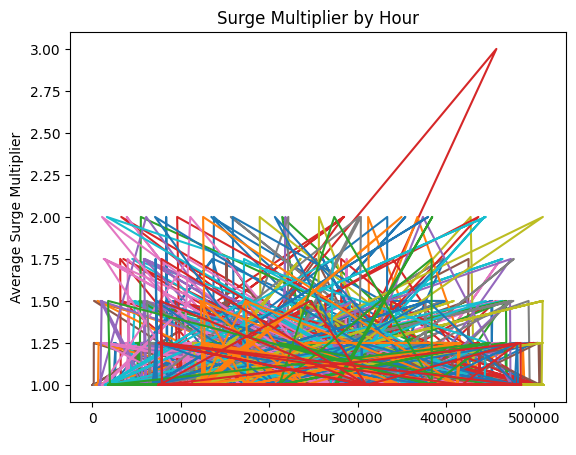

In [187]:
# Plot surge multiplier by hour
hourly_data['surge_multiplier'].plot()
plt.title("Surge Multiplier by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Surge Multiplier")
plt.show()

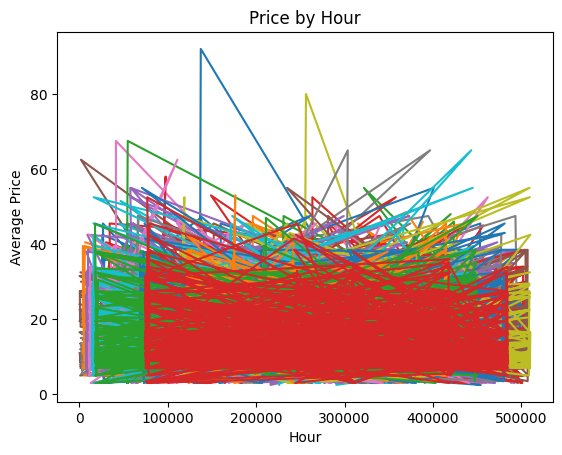

In [188]:
hourly_data['price'].plot()
plt.title("Price by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Price")
plt.show()


In [189]:
sampled_df_int = sampled_df[['distance', 'time_stamp',
       'surge_multiplier',  'price', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'hour',
       'day']]

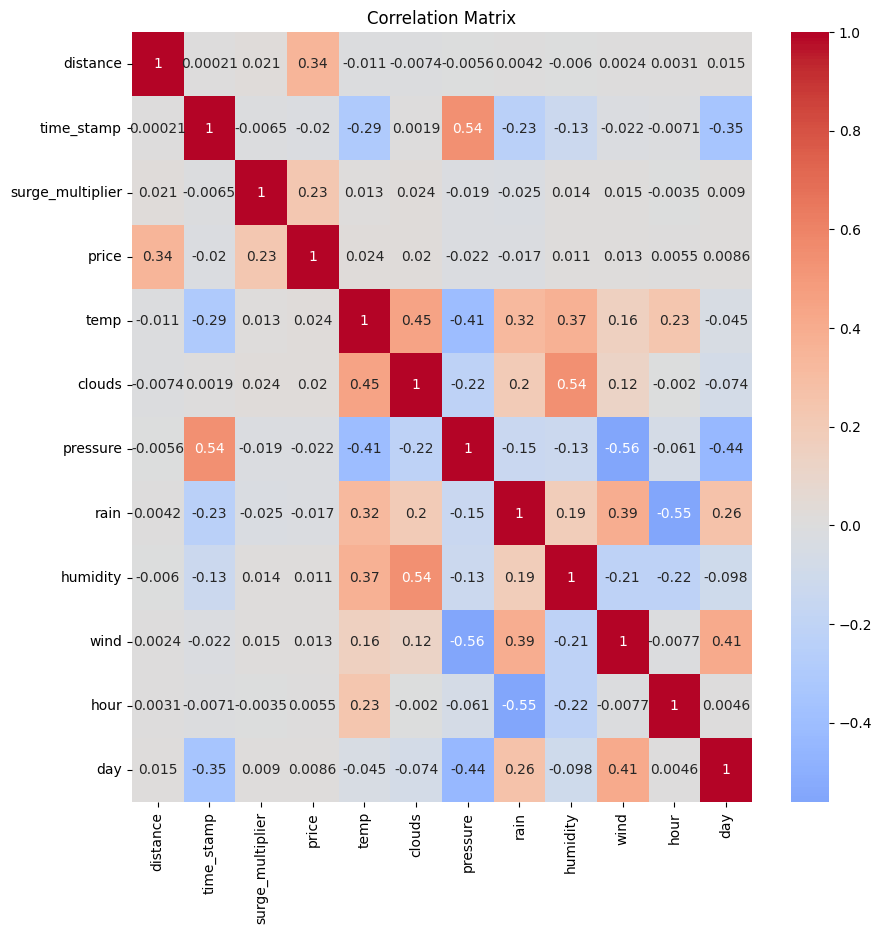

In [190]:
plt.figure(figsize=(10,10))
sns.heatmap(sampled_df_int.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

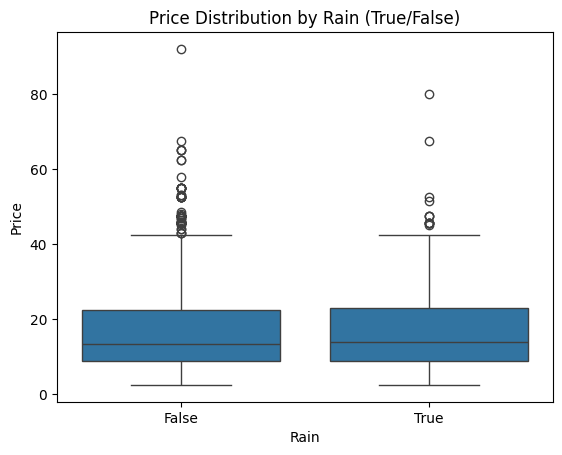

In [191]:
sns.boxplot(x=sampled_df['rain'].notnull(), y=sampled_df['price'])
plt.title("Price Distribution by Rain (True/False)")
plt.xlabel("Rain")
plt.ylabel("Price")
plt.show()


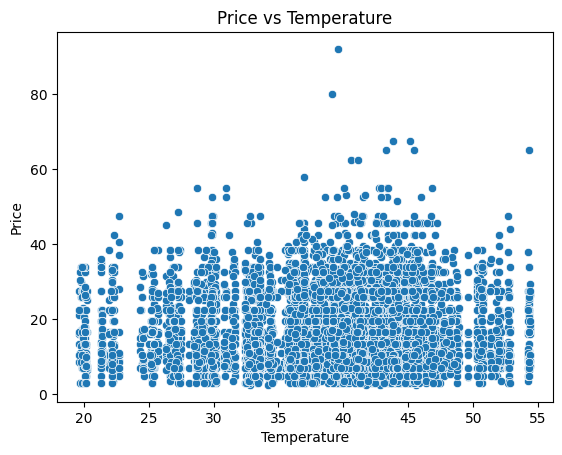

In [192]:
sns.scatterplot(x=sampled_df['temp'], y=sampled_df['price'])
plt.title("Price vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Price")
plt.show()


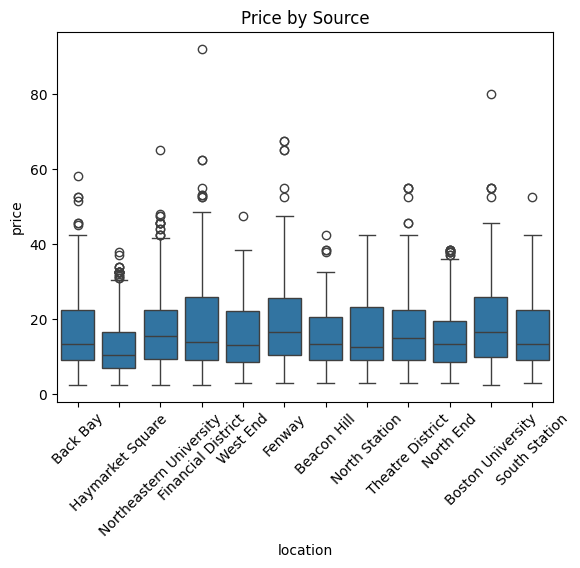

In [193]:
sns.boxplot(x=sampled_df['location'], y=sampled_df['price'])
plt.title("Price by Source")
plt.xticks(rotation=45)
plt.show()


In [194]:
grouped_data = merged_df.groupby('name')


In [195]:
grouped_summary = grouped_data[['distance', 'price', 'surge_multiplier']].describe()

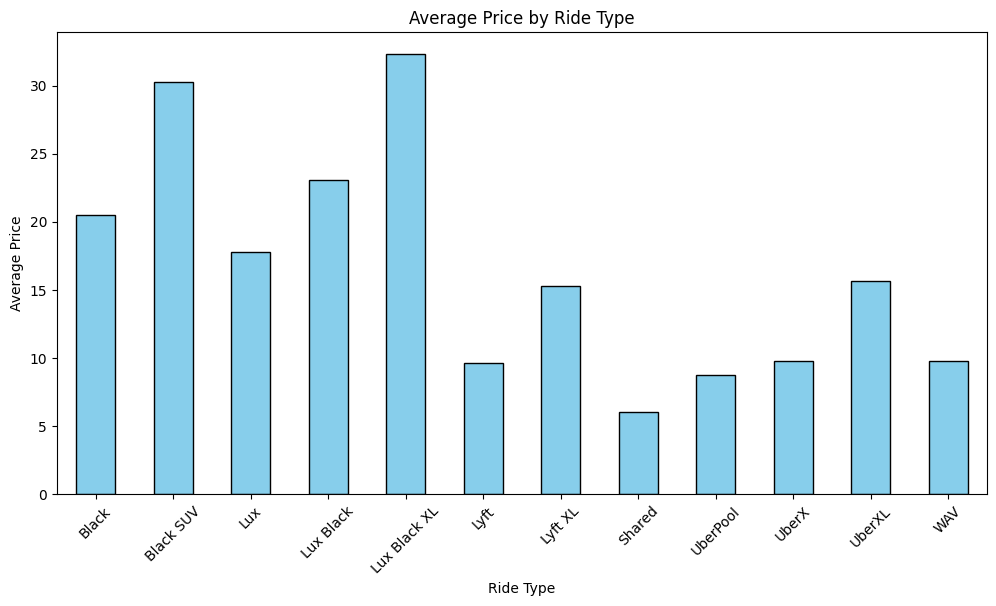

In [196]:
average_price_by_name = grouped_data['price'].mean()

plt.figure(figsize=(12, 6))
average_price_by_name.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Price by Ride Type")
plt.xlabel("Ride Type")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

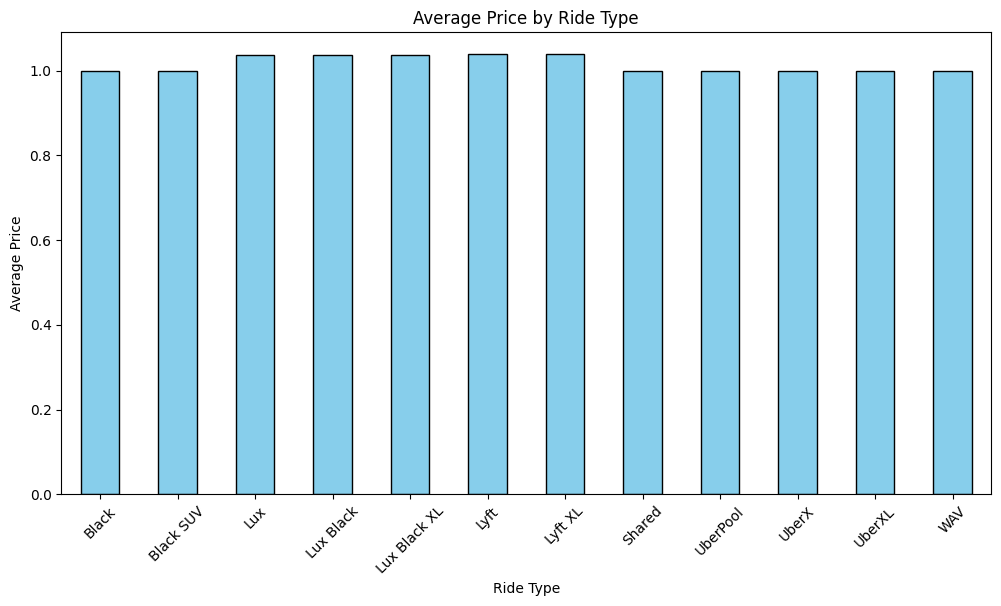

In [197]:
average_price_by_name = grouped_data['surge_multiplier'].mean()

plt.figure(figsize=(12, 6))
average_price_by_name.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Price by Ride Type")
plt.xlabel("Ride Type")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

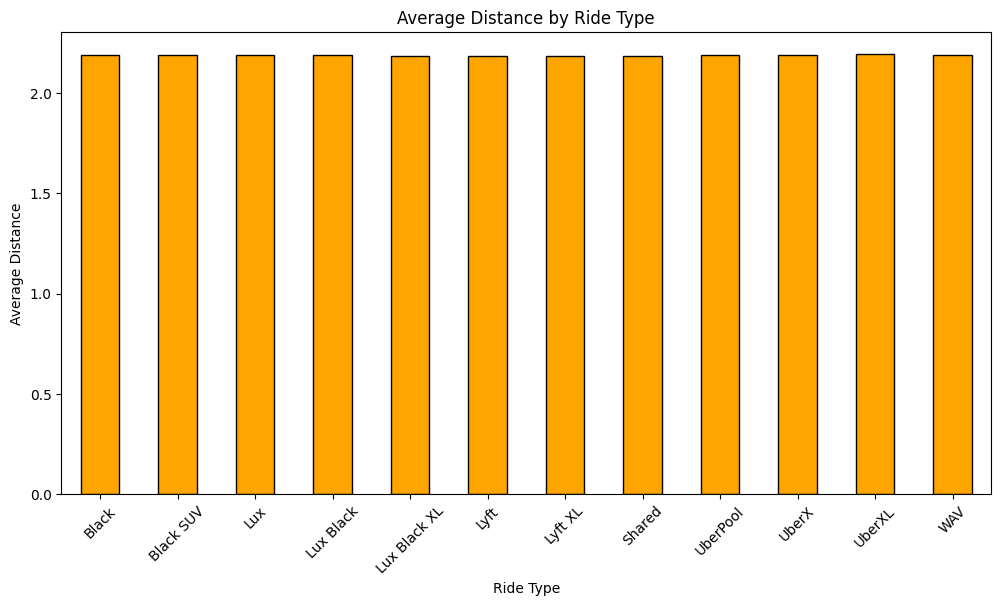

In [198]:
average_distance_by_name = grouped_data['distance'].mean()

# Plotting the average distance for each 'name' group
plt.figure(figsize=(12, 6))
average_distance_by_name.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Distance by Ride Type")
plt.xlabel("Ride Type")
plt.ylabel("Average Distance")
plt.xticks(rotation=45)
plt.show()

In [199]:
merged_df

,distance,cab_type,time_stamp_taxi,destination,location,surge_multiplier,id,product_id,name,price,...,time_st_weather,temp,clouds,pressure,rain,humidity,wind,time_stamp,hour,day
68,2.86,Uber,2018-11-26 05:27:00,West End,Northeastern University,1.0,82a01adb-809b-44e9-ad2f-88913462b486,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,8.5,...,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06,2018-11-26 05:18:00,5,26
69,3.22,Uber,2018-11-26 05:27:00,North Station,Northeastern University,1.0,beaa7fae-904d-44f1-a299-8c48cb6d9212,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,9.0,...,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06,2018-11-26 05:18:00,5,26
70,1.64,Uber,2018-11-26 05:27:00,Back Bay,Northeastern University,1.0,c01cec29-629a-4d76-82e6-42dcc9163de6,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.5,...,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06,2018-11-26 05:18:00,5,26
71,1.27,Lyft,2018-11-26 05:27:00,Back Bay,Northeastern University,1.0,bafb6305-8542-4a16-a278-dba8da3b7b56,lyft_plus,Lyft XL,10.5,...,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06,2018-11-26 05:18:00,5,26
72,2.61,Uber,2018-11-26 05:27:00,Beacon Hill,Northeastern University,1.0,18e5c270-e688-46a2-b2dc-006f78ce3c5b,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,15.0,...,2018-11-26 05:18:00,40.43,0.92,1013.76,NaN,0.93,3.06,2018-11-26 05:18:00,5,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510316,4.54,Lyft,2018-12-18 19:07:00,Fenway,Financial District,1.0,722c67c5-98ea-4f69-899d-0a96034ef2d9,lyft_lux,Lux Black,34.0,...,2018-12-18 18:45:00,31.19,0.00,1012.31,NaN,0.45,13.18,2018-12-18 18:45:00,18,18
510317,4.48,Uber,2018-12-18 19:07:00,Fenway,Financial District,1.0,2e438a0a-8aa1-4107-9dba-17719fb9a156,6c84fd89-3f11-4782-9b50-97c468b19529,Black,33.5,...,2018-12-18 18:45:00,31.19,0.00,1012.31,NaN,0.45,13.18,2018-12-18 18:45:00,18,18
510318,0.39,Uber,2018-12-18 19:07:00,South Station,Financial District,1.0,666129a3-a914-4109-9dad-90f191f9ebc1,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0,...,2018-12-18 18:45:00,31.19,0.00,1012.31,NaN,0.45,13.18,2018-12-18 18:45:00,18,18
510319,1.08,Lyft,2018-12-18 19:07:00,Haymarket Square,Financial District,1.0,b98e14ef-f728-44b5-ab00-6c0f88da6cd7,lyft_lux,Lux Black,16.5,...,2018-12-18 18:45:00,31.19,0.00,1012.31,NaN,0.45,13.18,2018-12-18 18:45:00,18,18


In [200]:
merged_df['pickup_hour'] = merged_df['time_stamp'].dt.floor('H')

In [201]:
pickup_counts = merged_df.groupby('pickup_hour').size().reset_index(name='num_of_pickups')

In [202]:
pickup_counts

,pickup_hour,num_of_pickups
0,2018-11-26 05:00:00,1932
1,2018-11-26 07:00:00,1721
2,2018-11-26 11:00:00,3436
3,2018-11-26 14:00:00,3386
4,2018-11-26 16:00:00,3458
...,...,...
115,2018-12-18 07:00:00,3767
116,2018-12-18 10:00:00,3768
117,2018-12-18 13:00:00,3848
118,2018-12-18 15:00:00,3790


In [203]:
merged_df = merged_df.merge(pickup_counts, on='pickup_hour', how='left')

In [204]:
merged_df["pickup_hour"]

0        2018-11-26 05:00:00
1        2018-11-26 05:00:00
2        2018-11-26 05:00:00
3        2018-11-26 05:00:00
4        2018-11-26 05:00:00
                 ...        
508043   2018-12-18 18:00:00
508044   2018-12-18 18:00:00
508045   2018-12-18 18:00:00
508046   2018-12-18 18:00:00
508047   2018-12-18 18:00:00
Name: pickup_hour, Length: 508048, dtype: datetime64[ns]

In [205]:
merged_df["pickup_hour"].value_counts()

pickup_hour
2018-11-29 00:00:00    11281
2018-11-28 13:00:00    10259
2018-11-28 16:00:00    10000
2018-11-29 03:00:00     9748
2018-11-28 18:00:00     9186
                       ...  
2018-12-10 00:00:00     1882
2018-11-26 07:00:00     1721
2018-12-13 03:00:00     1485
2018-12-10 02:00:00     1382
2018-11-28 07:00:00      263
Name: count, Length: 120, dtype: int64

In [206]:
pickup_hour_counts = merged_df['pickup_hour'].value_counts()
merged_df['pickup_hour_counts'] = merged_df['pickup_hour'].map(pickup_hour_counts)


In [207]:
merged_df['pickup_hour_counts']

0         1932
1         1932
2         1932
3         1932
4         1932
          ... 
508043    2217
508044    2217
508045    2217
508046    2217
508047    2217
Name: pickup_hour_counts, Length: 508048, dtype: int64

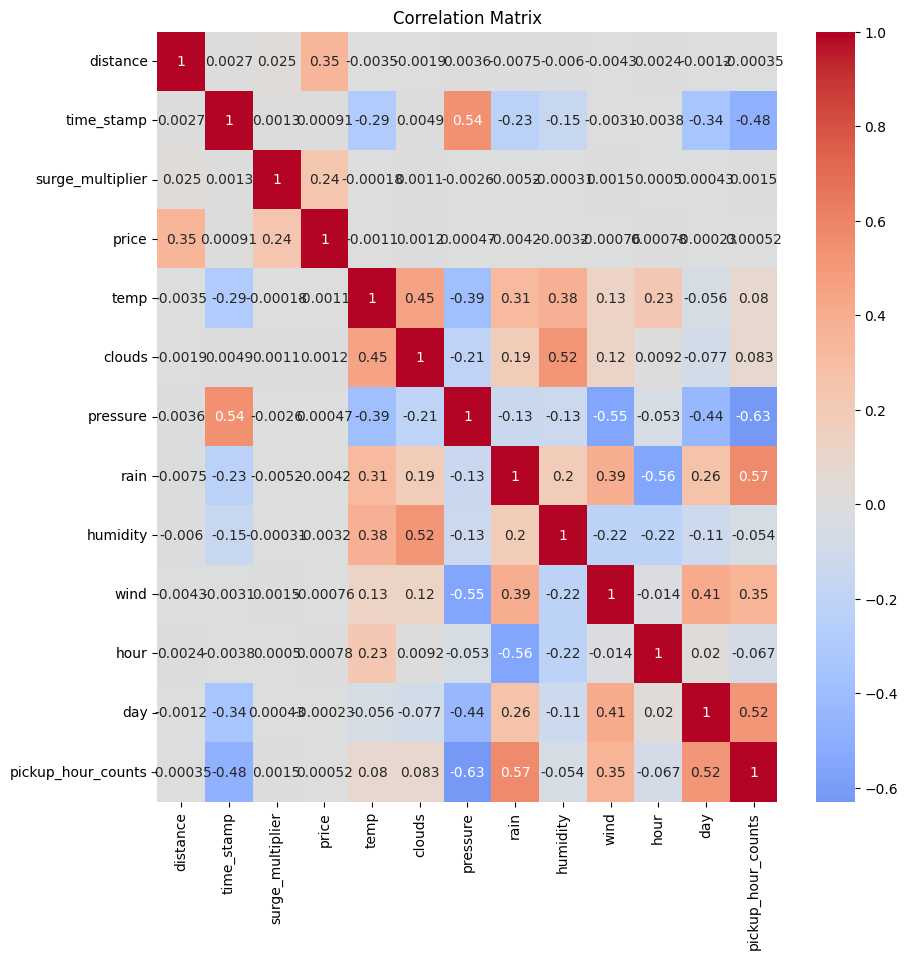

In [208]:
sampled_df_int = merged_df[['distance', 'time_stamp',
       'surge_multiplier',  'price', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'hour',
       'day','pickup_hour_counts']]
plt.figure(figsize=(10,10))
sns.heatmap(sampled_df_int.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [209]:
# Ensure the 'time_stamp' column is in datetime format
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'], unit='s')

# Extract the hour from the time_stamp
merged_df['pickup_hour'] = merged_df['time_stamp'].dt.hour

# Calculate the correlation between pickup_hour and price
correlation = merged_df[['pickup_hour', 'price']].corr().iloc[0, 1]

# Display the correlation result
correlation


0.0007825834913579165

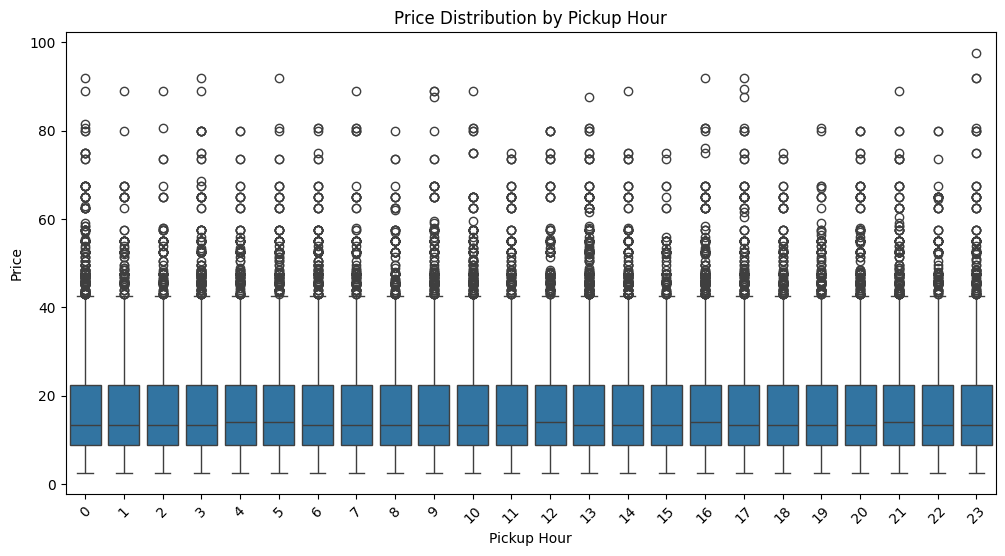

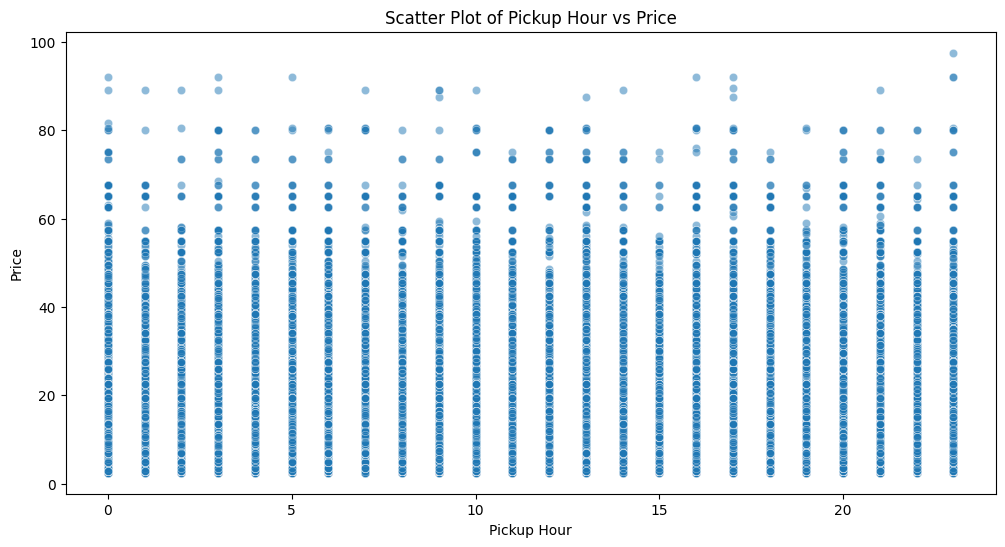

In [210]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=merged_df['pickup_hour'], y=merged_df['price'])
plt.title("Price Distribution by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Scatter plot to visualize the trend
plt.figure(figsize=(12, 6))
sns.scatterplot(x=merged_df['pickup_hour'], y=merged_df['price'], alpha=0.5)
plt.title("Scatter Plot of Pickup Hour vs Price")
plt.xlabel("Pickup Hour")
plt.ylabel("Price")
plt.show()

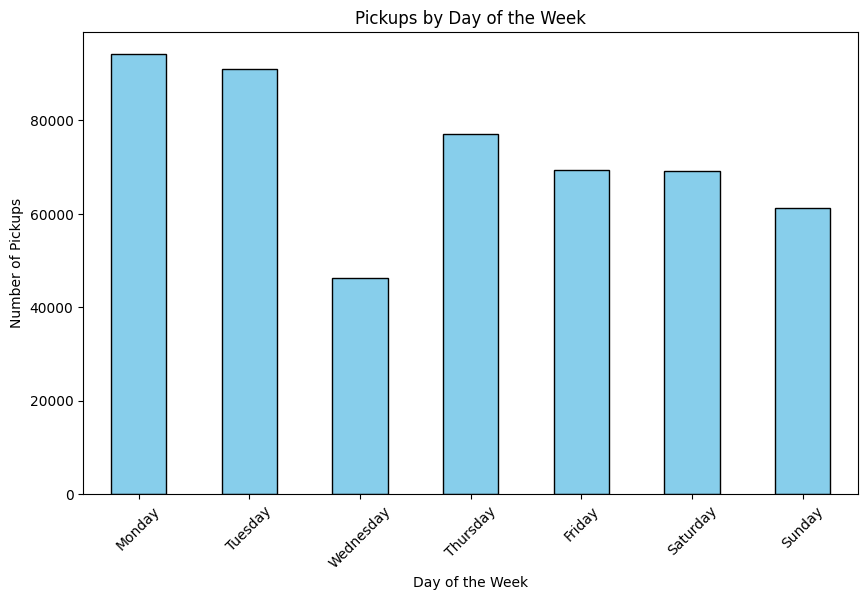

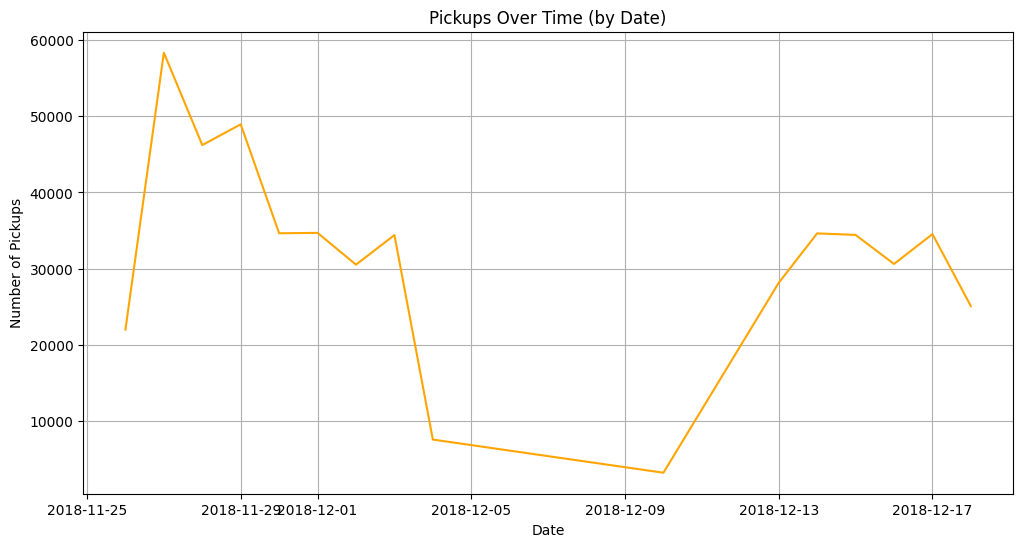

In [211]:
merged_df['day_of_week'] = merged_df['time_stamp'].dt.day_name()
merged_df['date'] = merged_df['time_stamp'].dt.date

# Group by day of the week
pickups_by_day = merged_df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Group by date
pickups_by_date = merged_df['date'].value_counts().sort_index()

# Plot pickups by day of the week
plt.figure(figsize=(10, 6))
pickups_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Pickups by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

# Plot pickups by date
plt.figure(figsize=(12, 6))
pickups_by_date.plot(color='orange')
plt.title("Pickups Over Time (by Date)")
plt.xlabel("Date")
plt.ylabel("Number of Pickups")
plt.grid()
plt.show()

In [212]:
# Average price by ride type
average_price_by_name = merged_df.groupby('name')['price'].mean()
print(average_price_by_name)

# Average price by cab type
average_price_by_cab_type = merged_df.groupby('cab_type')['price'].mean()
print(average_price_by_cab_type)


name
Black           20.519552
Black SUV       30.295038
Lux             17.777289
Lux Black       23.064166
Lux Black XL    32.309132
Lyft             9.617249
Lyft XL         15.317830
Shared           6.028459
UberPool         8.745600
UberX            9.769943
UberXL          15.677648
WAV              9.754643
Name: price, dtype: float64
cab_type
Lyft    17.358929
Uber    15.786777
Name: price, dtype: float64


In [213]:

# # Boxplot of price by ride type
# sns.boxplot(x='name', y='price', data=merged_df)
# plt.xticks(rotation=45)
# plt.title("Price by Ride Type")
# plt.show()

# # Scatterplot: distance vs price colored by surge_multiplier
# sns.scatterplot(x='distance', y='price', hue='surge_multiplier', data=merged_df, alpha=0.5)
# plt.title("Distance vs Price (Colored by Surge Multiplier)")
# plt.show()


In [214]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp_taxi', 'destination', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', 'time_s',
       'location_taxi', 'temp_taxi', 'clouds_taxi', 'pressure_taxi',
       'rain_taxi', 'humidity_taxi', 'wind_taxi', 'location_weather_taxi',
       'time_st_taxi', 'time_stamp_weather', 'location_weather_weather',
       'time_st_weather', 'temp', 'clouds', 'pressure', 'rain', 'humidity',
       'wind', 'time_stamp', 'hour', 'day', 'pickup_hour', 'num_of_pickups',
       'pickup_hour_counts', 'day_of_week', 'date'],
      dtype='object')

In [215]:
merged_df.columns = ['distance', 'cab_type', 'time_stamp_taxi', '1', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', '2',
       '2', '4', '5', '6',
       '7', '8', '9', '10',
       '11', '12', '13',
       '14', 'temp', 'clouds', 'pressure', 'rain', 'humidity',
       'wind', 'time_stamp', 'hour', 'day', 'pickup_hour', 'num_of_pickups',
       'pickup_hour_counts', 'day_of_week', 'date']


In [216]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp_taxi', '1', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', '2', '2', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'temp', 'clouds',
       'pressure', 'rain', 'humidity', 'wind', 'time_stamp', 'hour', 'day',
       'pickup_hour', 'num_of_pickups', 'pickup_hour_counts', 'day_of_week',
       'date'],
      dtype='object')

In [217]:
merged_df = merged_df.drop(['2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'], axis=1)

In [218]:
merged_df = merged_df.drop([ '1'], axis=1)

In [219]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp_taxi', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'time_stamp', 'hour',
       'day', 'pickup_hour', 'num_of_pickups', 'pickup_hour_counts',
       'day_of_week', 'date'],
      dtype='object')

In [220]:
merged_df

,distance,cab_type,time_stamp_taxi,location,surge_multiplier,id,product_id,name,price,temp,...,humidity,wind,time_stamp,hour,day,pickup_hour,num_of_pickups,pickup_hour_counts,day_of_week,date
0,2.86,Uber,2018-11-26 05:27:00,Northeastern University,1.0,82a01adb-809b-44e9-ad2f-88913462b486,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,8.5,40.43,...,0.93,3.06,2018-11-26 05:18:00,5,26,5,1932,1932,Monday,2018-11-26
1,3.22,Uber,2018-11-26 05:27:00,Northeastern University,1.0,beaa7fae-904d-44f1-a299-8c48cb6d9212,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,9.0,40.43,...,0.93,3.06,2018-11-26 05:18:00,5,26,5,1932,1932,Monday,2018-11-26
2,1.64,Uber,2018-11-26 05:27:00,Northeastern University,1.0,c01cec29-629a-4d76-82e6-42dcc9163de6,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.5,40.43,...,0.93,3.06,2018-11-26 05:18:00,5,26,5,1932,1932,Monday,2018-11-26
3,1.27,Lyft,2018-11-26 05:27:00,Northeastern University,1.0,bafb6305-8542-4a16-a278-dba8da3b7b56,lyft_plus,Lyft XL,10.5,40.43,...,0.93,3.06,2018-11-26 05:18:00,5,26,5,1932,1932,Monday,2018-11-26
4,2.61,Uber,2018-11-26 05:27:00,Northeastern University,1.0,18e5c270-e688-46a2-b2dc-006f78ce3c5b,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,15.0,40.43,...,0.93,3.06,2018-11-26 05:18:00,5,26,5,1932,1932,Monday,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508043,4.54,Lyft,2018-12-18 19:07:00,Financial District,1.0,722c67c5-98ea-4f69-899d-0a96034ef2d9,lyft_lux,Lux Black,34.0,31.19,...,0.45,13.18,2018-12-18 18:45:00,18,18,18,2217,2217,Tuesday,2018-12-18
508044,4.48,Uber,2018-12-18 19:07:00,Financial District,1.0,2e438a0a-8aa1-4107-9dba-17719fb9a156,6c84fd89-3f11-4782-9b50-97c468b19529,Black,33.5,31.19,...,0.45,13.18,2018-12-18 18:45:00,18,18,18,2217,2217,Tuesday,2018-12-18
508045,0.39,Uber,2018-12-18 19:07:00,Financial District,1.0,666129a3-a914-4109-9dad-90f191f9ebc1,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0,31.19,...,0.45,13.18,2018-12-18 18:45:00,18,18,18,2217,2217,Tuesday,2018-12-18
508046,1.08,Lyft,2018-12-18 19:07:00,Financial District,1.0,b98e14ef-f728-44b5-ab00-6c0f88da6cd7,lyft_lux,Lux Black,16.5,31.19,...,0.45,13.18,2018-12-18 18:45:00,18,18,18,2217,2217,Tuesday,2018-12-18


In [221]:
merged_df[merged_df["cab_type"] == "Lyft"]["name"].unique()

array(['Lyft XL', 'Lux Black', 'Shared', 'Lyft', 'Lux', 'Lux Black XL'],
      dtype=object)

In [222]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp_taxi', 'location',
       'surge_multiplier', 'id', 'product_id', 'name', 'price', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'time_stamp', 'hour',
       'day', 'pickup_hour', 'num_of_pickups', 'pickup_hour_counts',
       'day_of_week', 'date'],
      dtype='object')

In [223]:
# Fill NaN values in rain column with 0
merged_df['rain'] = merged_df['rain'].fillna(0)

In [224]:
# Encode categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()

merged_df['cab_type1'] = merged_df['cab_type']
merged_df['name1'] = merged_df['name']
merged_df['cab_type'] = le.fit_transform(merged_df['cab_type'])
merged_df['name'] = le1.fit_transform(merged_df['name'])

In [104]:
# Prepare features and target
x_data = merged_df[['distance', 'cab_type','surge_multiplier' ,'name', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind','hour',
       'day', 'pickup_hour_counts']]
y_data = merged_df["price"]

In [105]:
# Train random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Print model score
print(f"Random Forest R2 Score: {rf_model.score(X_test, y_test):.4f}")

Random Forest R2 Score: 0.9587


In [236]:
# Drop duplicates
print("Shape before dropping duplicates:", x_data.shape, y_data.shape)
x_data_unique = x_data.drop_duplicates()
y_data_unique = y_data[x_data_unique.index]
print("Shape after dropping duplicates:", x_data_unique.shape, y_data_unique.shape)
# Retrain model on deduplicated data
X_train_unique, X_test_unique, y_train_unique, y_test_unique = train_test_split(x_data_unique, y_data_unique, test_size=0.2, random_state=42)
rf_model_unique = RandomForestRegressor(n_estimators=20, max_depth=12, random_state=42)
rf_model_unique.fit(X_train_unique, y_train_unique)

print(f"\nR2 Score after dropping duplicates: {rf_model_unique.score(X_test_unique, y_test_unique):.4f}")


Shape before dropping duplicates: (508048, 13) (508048,)
Shape after dropping duplicates: (310937, 13) (310937,)

R2 Score after dropping duplicates: 0.9669


In [238]:
import joblib
import streamlit as st
from datetime import datetime
import sklearn

print(f"joblib version: {joblib.__version__}")
print(f"streamlit version: {st.__version__}")
print(f"sklearn version: {sklearn.__version__}")

joblib version: 1.4.2
streamlit version: 1.41.1
sklearn version: 1.5.2


In [237]:
# Save the trained model using joblib
import joblib

# Save the random forest model
joblib.dump(rf_model_unique, 'taxi_price_model.joblib')

# Save the label encoders
joblib.dump(le, 'cab_type_encoder.joblib')
joblib.dump(le1, 'name_encoder.joblib')


['name_encoder.joblib']

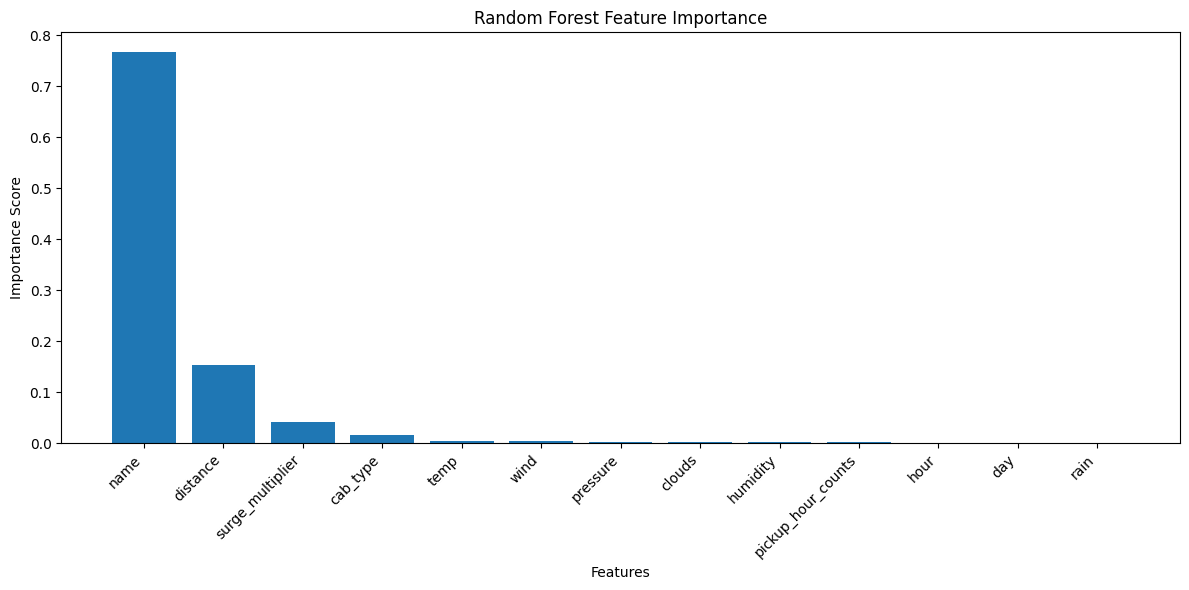

In [110]:
# Plot feature importance
import matplotlib.pyplot as plt

# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': x_data.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Create bar plot
plt.figure(figsize=(12,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


In [115]:
from ipywidgets import interact, widgets, VBox, Output, Button
import pandas as pd

# Function to predict price based on inputs
def predict_price_on_click(button, output, distance, surge_multiplier, rain, temp, humidity, clouds, 
                           ride_name, cab_type, pickup_hour_counts, hour, day, wind, pressure, 
                           rf_model, le_cab_type, le_name):
    # Encode categorical inputs
    cab_type_encoded = le_cab_type.transform([cab_type])[0]
    ride_name_encoded = le_name.transform([ride_name])[0]

    # Create input feature array
    input_features = pd.DataFrame([{
        'distance': distance,
        'cab_type': cab_type_encoded,
        'surge_multiplier': surge_multiplier,
        'name': ride_name_encoded,
        'temp': temp,
        'clouds': clouds,
        'pressure': pressure,
        'rain': int(rain),  # Convert boolean to integer
        'humidity': humidity,
        'wind': wind,
        'hour': hour,
        'day': day,
        'pickup_hour_counts': pickup_hour_counts
    }])

    # Predict price using the trained model
    predicted_price = rf_model.predict(input_features)[0]

    # Display prediction in the output widget
    output.clear_output()
    with output:
        print(f"Estimated Price: ${predicted_price:.2f}")
# Safely retrieve the classes or use default options
def get_encoder_classes(encoder, default_options):
    try:
        return encoder.classes_.tolist() if hasattr(encoder, 'classes_') else default_options
    except AttributeError:
        return default_options

# Function to create the interactive simulator
def interactive_simulation_button(rf_model, le_cab_type, le_name):
    # Get encoder classes with fallback options
    cab_type_options = get_encoder_classes(le_cab_type, ['Uber', 'Lyft'])
    ride_name_options = get_encoder_classes(le_name, ['UberX', 'UberPool', 'Lyft', 'Lyft XL'])

    # Widgets for user inputs
    distance = widgets.IntSlider(value=10, min=0, max=50, step=1, description="Distance")
    surge_multiplier = widgets.FloatSlider(value=1.5, min=1, max=5, step=0.1, description="Surge Multiplier")
    rain = widgets.Checkbox(value=False, description="Rain")
    temp = widgets.IntSlider(value=25, min=0, max=40, step=1, description="Temperature")
    humidity = widgets.IntSlider(value=50, min=0, max=100, step=1, description="Humidity")
    clouds = widgets.IntSlider(value=0, min=0, max=100, step=1, description="Cloudiness")
    ride_name = widgets.Dropdown(
        options=ride_name_options,
        value=ride_name_options[0],  # Default to the first option
        description="Ride Name"
    )
    cab_type = widgets.Dropdown(
        options=cab_type_options,
        value=cab_type_options[0],  # Default to the first option
        description="Cab Type"
    )
    pickup_hour_counts = widgets.IntSlider(value=0, min=0, max=100, step=1, description="Hourly Pickups")
    hour = widgets.IntSlider(value=12, min=0, max=23, step=1, description="Hour")
    day = widgets.IntSlider(value=15, min=1, max=31, step=1, description="Day")
    wind = widgets.IntSlider(value=5, min=0, max=20, step=1, description="Wind")
    pressure = widgets.IntSlider(value=1013, min=950, max=1050, step=1, description="Pressure")

    # Button for prediction
    button = widgets.Button(description="Predict Price", button_style="success")
    
    # Output widget for displaying the result
    output = widgets.Output()

    # Button click event handler
    button.on_click(lambda b: predict_price_on_click(
        b, output, distance.value, surge_multiplier.value, rain.value, temp.value, humidity.value, clouds.value, 
        ride_name.value, cab_type.value, pickup_hour_counts.value, hour.value, day.value, wind.value, pressure.value, 
        rf_model, le_cab_type, le_name
    ))

    # Layout
    inputs = VBox([distance, surge_multiplier, rain, temp, humidity, clouds, ride_name, cab_type, 
                   pickup_hour_counts, hour, day, wind, pressure, button])
    app = VBox([inputs, output])
    return app

# Example: Run the interactive simulation with button
# Replace `rf_model`, `le_cab_type`, and `le_name` with your trained model and encoders
interactive_app = interactive_simulation_button(rf_model, le, le1)
interactive_app


In [229]:
# Save model and encoders to files
import joblib

joblib.dump(rf_model, 'rf_model.joblib')
joblib.dump(le, 'cab_type_encoder.joblib') 
joblib.dump(le1, 'ride_name_encoder.joblib')

def load_model_and_predict(distance, surge_multiplier, rain, temp, humidity, clouds,
                          ride_name, cab_type, pickup_hour_counts, hour, day, wind, pressure):
    """
    Load saved model and encoders and make predictions
    
    Args:
        distance (float): Trip distance
        surge_multiplier (float): Surge pricing multiplier
        rain (bool): Whether it's raining
        temp (float): Temperature
        humidity (int): Humidity percentage
        clouds (int): Cloud coverage percentage
        ride_name (str): Name of ride type
        cab_type (str): Type of cab
        pickup_hour_counts (int): Number of pickups in that hour
        hour (int): Hour of day
        day (int): Day of month
        wind (float): Wind speed
        pressure (float): Atmospheric pressure
        
    Returns:
        float: Predicted price
    """
    # Load model and encoders
    model = joblib.load('rf_model.joblib')
    cab_encoder = joblib.load('cab_type_encoder.joblib')
    ride_encoder = joblib.load('ride_name_encoder.joblib')
    
    # Encode categorical variables
    cab_type_encoded = cab_encoder.transform([cab_type])[0]
    ride_name_encoded = ride_encoder.transform([ride_name])[0]
    
    # Create feature array
    features = [[distance, cab_type_encoded, surge_multiplier, ride_name_encoded, temp, 
                clouds, pressure, rain, humidity, wind, pickup_hour_counts, hour, day]]
    
    # Make prediction
    predicted_price = model.predict(features)[0]
    
    return predicted_price

# Print example usage
print("Model and encoders saved. Use load_model_and_predict() function to make predictions.")


Model and encoders saved. Use load_model_and_predict() function to make predictions.


In [226]:
merged_df.iloc[0]

distance                                              2.86
cab_type                                                 1
time_stamp_taxi                        2018-11-26 05:27:00
location                           Northeastern University
surge_multiplier                                       1.0
id                    82a01adb-809b-44e9-ad2f-88913462b486
product_id            55c66225-fbe7-4fd5-9072-eab1ece5e23e
name                                                     9
price                                                  8.5
temp                                                 40.43
clouds                                                0.92
pressure                                           1013.76
rain                                                   0.0
humidity                                              0.93
wind                                                  3.06
time_stamp                             2018-11-26 05:18:00
hour                                                    

In [227]:
load_model_and_predict(2.86, 1, 0, 40, 0.93, 0.92,
                          "UberX", "Uber", 1932, 5, 26, 3.06,  1013.76)

9.078470238095237

In [ ]:
load_model_and_predict(distance, surge_multiplier, rain, temp, humidity, clouds,
                          ride_name, cab_type, pickup_hour_counts, hour, day, wind, pressure)

In [121]:
print("Label encoder 1 classes:", le1.classes_)
print("Label encoder classes:", le.classes_)

Label encoder 1 classes: ['Black' 'Black SUV' 'Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL'
 'Shared' 'UberPool' 'UberX' 'UberXL' 'WAV']
Label encoder classes: ['Lyft' 'Uber']


In [114]:
merged_df.iloc[0]

distance                                              2.86
cab_type                                                 1
time_stamp_taxi                        2018-11-26 05:27:00
location                           Northeastern University
surge_multiplier                                       1.0
id                    82a01adb-809b-44e9-ad2f-88913462b486
product_id            55c66225-fbe7-4fd5-9072-eab1ece5e23e
name                                                     9
price                                                  8.5
temp                                                 40.43
clouds                                                0.92
pressure                                           1013.76
rain                                                   0.0
humidity                                              0.93
wind                                                  3.06
time_stamp                             2018-11-26 05:18:00
hour                                                    

In [240]:
merged_df_fin = merged_df[['distance',  'time_stamp_taxi', 'location',
       'surge_multiplier', 'id', 'product_id',  'price', 'temp',
       'clouds', 'pressure', 'rain', 'humidity', 'wind',  'hour',
       'day',   'pickup_hour_counts',
       'day_of_week', 'date', 'cab_type1', 'name1']]

In [241]:
merged_df_fin.to_csv("voo_data.csv")

In [244]:
merged_df_fin["distance"].max()

7.86